In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
health_df = pd.read_csv('500_Cities.csv')
tracts_df = pd.read_csv('500_Census_Tracts.csv')
unhealthy_behaviors_df = health_df[health_df.Category == 'Unhealthy Behaviors']
prevention_df = health_df[health_df.Category == 'Prevention']
health_outcomes_df = health_df[health_df.Category == 'Health Outcomes']

In [4]:
tracts_reduced = tracts_df[['StateAbbr', 'PlaceName', 'PlaceFIPS', 'TractFIPS', 'Place_TractID', 'Population2010',
                            'ACCESS2_CrudePrev', 'ACCESS2_Crude95CI', 'BINGE_CrudePrev', 'BINGE_Crude95CI',
                            'CHECKUP_CrudePrev', 'CHECKUP_Crude95CI', 'COREM_CrudePrev', 'COREM_Crude95CI', 
                            'COREW_CrudePrev', 'COREW_Crude95CI', 'CSMOKING_CrudePrev', 'CSMOKING_Crude95CI',
                            'DENTAL_CrudePrev', 'DENTAL_Crude95CI', 'LPA_CrudePrev', 'LPA_Crude95CI',
                            'MAMMOUSE_CrudePrev', 'MAMMOUSE_Crude95CI', 'MHLTH_CrudePrev', 'MHLTH_Crude95CI',
                            'OBESITY_CrudePrev', 'OBESITY_Crude95CI', 'PHLTH_CrudePrev', 'PHLTH_Crude95CI', 'SLEEP_CrudePrev', 'SLEEP_Crude95CI', 'Geolocation']]
tracts_reduced.columns
tracts_reduced.StateAbbr.unique()

array(['AL', 'AK', 'AZ', 'TN', 'TX', 'CA', 'FL', 'AR', 'CO', 'CT', 'DE',
       'DC', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME',
       'MD', 'MA', 'NC', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NM', 'NY', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [5]:
tracts_CA = tracts_reduced[tracts_reduced.StateAbbr == 'CA']

In [30]:
# Regression on CA tracts only
#df = pd.DataFrame({"A": [10,20,30,40,50], "B": [20, 30, 10, 40, 50], "C": [32, 234, 23, 23, 42523]})
#res = ols(y=df['A'], x=df[['B','C']])
#df = pd.DataFrame({"A": [10,20,30,40,50], "B": [20, 30, 10, 40, 50], "C": [32, 234, 23, 23, 42523]})
result = sm.ols(formula="MHLTH_CrudePrev ~ BINGE_CrudePrev + CSMOKING_CrudePrev + LPA_CrudePrev + OBESITY_CrudePrev + SLEEP_CrudePrev + Population2010",
                data=tracts_CA).fit()
print(result.params)
print(result.summary())

Intercept            -1.906557
BINGE_CrudePrev       0.121535
CSMOKING_CrudePrev    0.470923
LPA_CrudePrev         0.149118
OBESITY_CrudePrev     0.059972
SLEEP_CrudePrev       0.022876
Population2010        0.000005
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        MHLTH_CrudePrev   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.482e+04
Date:                Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:54:21   Log-Likelihood:                -5784.9
No. Observations:                5239   AIC:                         1.158e+04
Df Residuals:                    5232   BIC:                         1.163e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                    

In [44]:
tracts_4states = tracts_reduced[(tracts_reduced.StateAbbr == 'CA') | (tracts_reduced.StateAbbr == 'IL') | 
                                (tracts_reduced.StateAbbr == 'NY') | (tracts_reduced.StateAbbr == 'WA')]

In [73]:
tracts_groups = tracts_reduced.groupby(['PlaceName'])
mean_sleep = tracts_groups['SLEEP_CrudePrev']

474

In [ ]:
sample_cities[[Min Sleep]] = mean

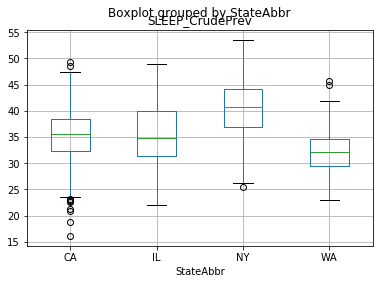

In [45]:
tracts_4states.boxplot('SLEEP_CrudePrev', by='StateAbbr')

In [ ]:
tracts_4states.PlaceName.unique()

In [47]:
tracts_4cities = tracts_4states[(tracts_4states.PlaceName == 'Los Angeles') | (tracts_4states.PlaceName == 'Chicago') | 
                                (tracts_4states.PlaceName == 'New York') | (tracts_4states.PlaceName == 'Seattle')]

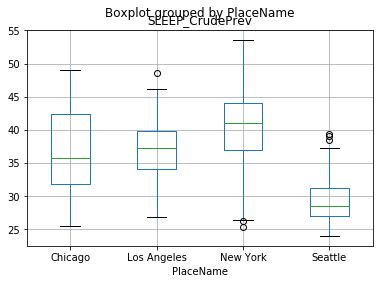

In [48]:
tracts_4cities.boxplot('SLEEP_CrudePrev', by='PlaceName')

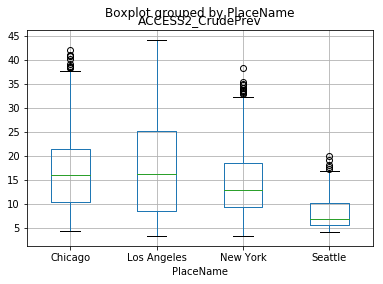

In [57]:
tracts_4cities.boxplot('ACCESS2_CrudePrev', by='PlaceName')

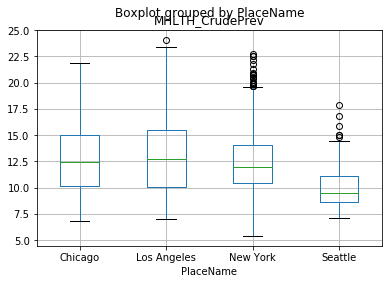

In [49]:
tracts_4cities.boxplot('MHLTH_CrudePrev', by='PlaceName')

In [55]:
mod = ols('SLEEP_CrudePrev ~ PlaceName', data=tracts_4cities).fit()
aov_table_1 = sm.stats.anova_lm(mod, typ=2)
print(aov_table_1)

                 sum_sq      df          F         PR(>F)
PlaceName  23557.786181     3.0  323.48552  3.242181e-188
Residual   97949.430347  4035.0        NaN            NaN


In [56]:
mod = ols('MHLTH_CrudePrev ~ PlaceName', data=tracts_4cities).fit()
aov_table_2 = sm.stats.anova_lm(mod, typ=2)
print(aov_table_2)

                 sum_sq      df          F        PR(>F)
PlaceName   1161.481998     3.0  42.518621  4.806908e-27
Residual   36741.391550  4035.0        NaN           NaN
